In [19]:
import pandas as pd
import dask.dataframe as dd

In [2]:
df = dd.read_parquet('/scratch/pstjohn/uniparc/uniref100/*', engine='pyarrow')

In [3]:
df = df.compute()

In [4]:
df.head()

,UniRef100 ID,UniRef90 ID,UniRef50 ID,NCBI taxonomy,length,Sequence
0,UniRef100_A0A2S7NN72,UniRef90_A0A2S7NN72,UniRef50_A0A2S7NN72,2070414,119,MSTPTLRQLHRALKNHKEFVAPPADVTGQEPAKGVGRRVKALAPNP...
1,UniRef100_A0A2S7NSC2,UniRef90_A0A2S7NSC2,UniRef50_W9CVC8,2070414,119,MYTPTILKTLVLLAITSIATADLHHNGICVNTGSGQNVYNSDATIA...
2,UniRef100_A0A2S7NUH4,UniRef90_A0A2S7NUH4,UniRef50_A0A2S7NUH4,2070414,174,MQHLARLSTISIENVVQPTVICSPPEQLRMLSSSYGISTKEIIDLR...
3,UniRef100_A0A2S7PRB4,UniRef90_A0A2S7QB10,UniRef50_A0A194XNJ0,2070414,269,MAFSRAAILRNLRNFRARPTAARPQLVNQIAKRTYASHGGHETAKA...
4,UniRef100_A0A2S7PRV3,UniRef90_A0A2S7PRV3,UniRef50_A0A1Y2EKE2,2070414,713,MADSILTVASDTEDVSPTQANSKASPSKNVVTNVDSARNTTKPTTD...


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
unique_uniref50 = df['UniRef50 ID'].unique()

In [11]:
train_temp, test_uniref50 = train_test_split(unique_uniref50, test_size=10000, random_state=1)
train_temp, dev_uniref50 = train_test_split(train_temp, test_size=10000, random_state=1)

In [14]:
train_temp_uniref100 = df[df['UniRef50 ID'].isin(train_temp)]['UniRef100 ID']

In [16]:
train_temp2_uniref100, test_uniref100 = train_test_split(train_temp_uniref100, test_size=10000, random_state=1)
train_uniref100, dev_uniref100 = train_test_split(train_temp2_uniref100, test_size=10000, random_state=1)

In [32]:
pd.Series(test_uniref50).to_csv('/scratch/pstjohn/uniparc/split_uniref100/test_uniref50.csv', index=False, header=False)
pd.Series(dev_uniref50).to_csv('/scratch/pstjohn/uniparc/split_uniref100/dev_uniref50.csv', index=False, header=False)
pd.Series(test_uniref100).to_csv('/scratch/pstjohn/uniparc/split_uniref100/test_uniref100.csv', index=False, header=False)
pd.Series(dev_uniref100).to_csv('/scratch/pstjohn/uniparc/split_uniref100/dev_uniref100.csv', index=False, header=False)

In [34]:
# 

In [37]:
df.head()

,UniRef100 ID,UniRef90 ID,UniRef50 ID,NCBI taxonomy,length,Sequence
0,UniRef100_A0A2S7NN72,UniRef90_A0A2S7NN72,UniRef50_A0A2S7NN72,2070414,119,MSTPTLRQLHRALKNHKEFVAPPADVTGQEPAKGVGRRVKALAPNP...
1,UniRef100_A0A2S7NSC2,UniRef90_A0A2S7NSC2,UniRef50_W9CVC8,2070414,119,MYTPTILKTLVLLAITSIATADLHHNGICVNTGSGQNVYNSDATIA...
2,UniRef100_A0A2S7NUH4,UniRef90_A0A2S7NUH4,UniRef50_A0A2S7NUH4,2070414,174,MQHLARLSTISIENVVQPTVICSPPEQLRMLSSSYGISTKEIIDLR...
3,UniRef100_A0A2S7PRB4,UniRef90_A0A2S7QB10,UniRef50_A0A194XNJ0,2070414,269,MAFSRAAILRNLRNFRARPTAARPQLVNQIAKRTYASHGGHETAKA...
4,UniRef100_A0A2S7PRV3,UniRef90_A0A2S7PRV3,UniRef50_A0A1Y2EKE2,2070414,713,MADSILTVASDTEDVSPTQANSKASPSKNVVTNVDSARNTTKPTTD...


In [38]:
df = df.sample(frac=1)

In [ ]:
df[df['UniRef50 ID'].isin(test_uniref50)]['Sequence'].to_csv(
    '/scratch/pstjohn/uniparc/split_uniref100/test_uniref50.txt', index=False, header=False)

df[df['UniRef50 ID'].isin(dev_uniref50)]['Sequence'].to_csv(
    '/scratch/pstjohn/uniparc/split_uniref100/dev_uniref50.txt', index=False, header=False)

df[df['UniRef100 ID'].isin(test_uniref100)]['Sequence'].to_csv(
    '/scratch/pstjohn/uniparc/split_uniref100/test_uniref100.txt', index=False, header=False)

df[df['UniRef100 ID'].isin(dev_uniref100)]['Sequence'].to_csv(
    '/scratch/pstjohn/uniparc/split_uniref100/dev_uniref100.txt', index=False, header=False)

df[df['UniRef100 ID'].isin(train_uniref100)]['Sequence'].to_csv(
    '/scratch/pstjohn/uniparc/split_uniref100/train_uniref100.txt', index=False, header=False)

In [40]:
df.head()

,UniRef100 ID,UniRef90 ID,UniRef50 ID,NCBI taxonomy,length,Sequence
12848,UniRef100_UPI000A19A695,UniRef90_J6P026,UniRef50_Q9KCM5,1351,430,MLFGTAKMNRENHLEIGGCDTVKLAQKFGTPLFVYDVAHIRAQARG...
9173,UniRef100_A0A0M2PKZ5,UniRef90_A0A0M2PKZ5,UniRef50_A0A0M2PKZ5,1455638,207,MSNMRIMLMVAVVTFTSVTCQFFSINVPTTHAFSEQTIQRGATGRD...
16069,UniRef100_A0A317ZSX3,UniRef90_A0A317ZSX3,UniRef50_A0A4R8W3E1,670052,156,MAVRDAFTADEWRVVAAAPFLVGMYLVSVSPSGPIGVVTEMLTAEK...
54198,UniRef100_A0A0W0HPX5,UniRef90_A0A0E3MS19,UniRef50_A0A0E3MS19,294,392,MLLNLFNEMRAAKVPVSVRELLDLINALKQRVTFADMDEFYYLSRA...
49788,UniRef100_A0A516Q3Z1,UniRef90_A0A516Q3Z1,UniRef50_A0A068VTH5,2596828,465,MVSVFDLLSIGIGPSSSHTVGPMRAAGRFVRELADSDQLHRVDRVQ...


In [ ]:
# df[df['UniRef50 ID'].isin(test_uniref50)].to_parquet('/scratch/pstjohn/uniparc/split_uniref100/test_uniref50.parquet')
# df[df['UniRef50 ID'].isin(dev_uniref50)].to_parquet('/scratch/pstjohn/uniparc/split_uniref100/dev_uniref50.parquet')

# df[df['UniRef100 ID'].isin(test_uniref100)].to_parquet('/scratch/pstjohn/uniparc/split_uniref100/test_uniref100.parquet')
# df[df['UniRef100 ID'].isin(dev_uniref100)].to_parquet('/scratch/pstjohn/uniparc/split_uniref100/dev_uniref100.parquet')

In [41]:
dev_100 = df[df['UniRef100 ID'].isin(dev_uniref100)]

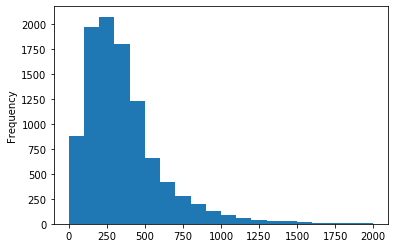

In [51]:
%matplotlib inline
dev_100['length'].plot.hist(bins=20, range=(0, 2000))

In [52]:
pd.Series({i: dev_100.Sequence.apply(lambda x: x[i]).value_counts() for i in range(0, 512)})

IndexError: string index out of range

In [45]:
dev_100.Sequence.apply(lambda x: x[1]).value_counts()

S    1319
K    1084
A     980
T     939
R     626
N     622
L     606
E     527
P     503
I     488
D     416
G     396
Q     342
V     331
F     261
H     162
M     135
Y     117
C      78
W      68
Name: Sequence, dtype: int64

In [46]:
dev_100.Sequence.apply(lambda x: x[2]).value_counts()

K    915
L    818
T    791
S    776
R    734
A    733
I    619
E    587
D    570
N    548
V    501
G    435
Q    423
P    399
F    362
Y    231
H    205
M    163
C    100
W     88
X      2
Name: Sequence, dtype: int64